In [379]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


### Dataset Link:
https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification

# Data Loading

In [380]:
train = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding= 'latin-1')

In [381]:
test=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',  encoding= 'latin-1')

In [382]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [383]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Data Exploration:

## a. Shape of Data

In [384]:
train.shape

(41157, 6)

In [385]:
test.shape

(3798, 6)

## b. Size of Data

In [386]:
train.size

246942

In [387]:
test.size

22788

## c. Attributes

In [388]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [389]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


## d. Properties

In [390]:
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [391]:
test.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [392]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [393]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [394]:
train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [395]:
test.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

## e. EDA

In [396]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [397]:
len(train)

41157

In [398]:
test.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [399]:
len(train)

41157

## f. Null Values

In [400]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [401]:
train.isnull().sum()/len(train)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

In [402]:
test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [403]:
test.isnull().sum()/len(test)*100

UserName          0.000000
ScreenName        0.000000
Location         21.958926
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

## g. Unique

In [404]:
train.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [405]:
train.nunique().sum()

135726

In [406]:
test.nunique().sum()

13131

# 3. Data Pre-processing

## WordCloud

In [407]:
import matplotlib.pyplot as plt

In [408]:
from wordcloud import WordCloud 

In [409]:
allWords = ' '.join([twts for twts in train['OriginalTweet']])

In [410]:
allWords[:500]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P My food stock is n'

In [411]:
wordcloud = WordCloud(width=450, height=260, random_state=42, max_font_size=105).generate(allWords)

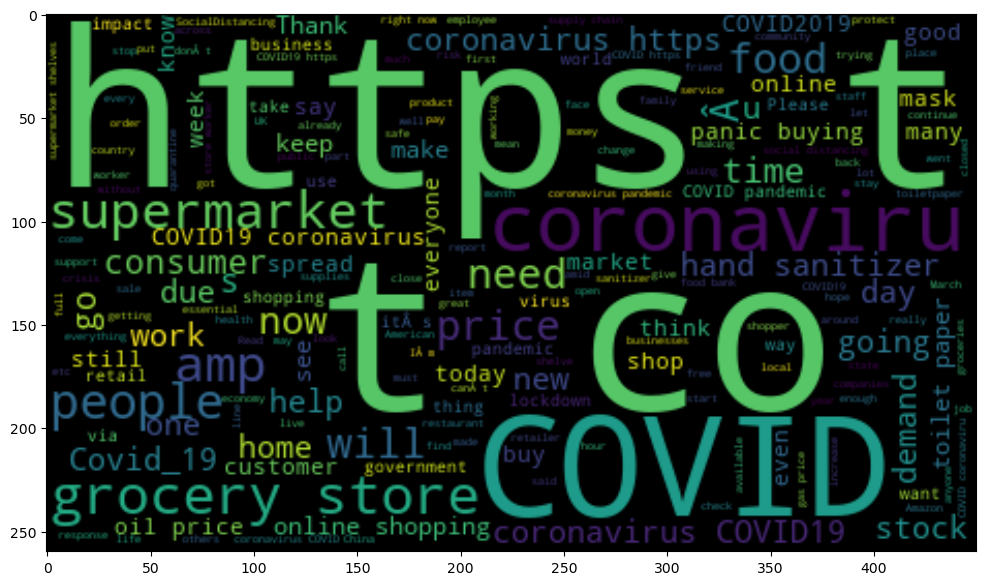

In [412]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear', cmap='viridis')
plt.show()

### Tweets Sentiment Distribution --> Train

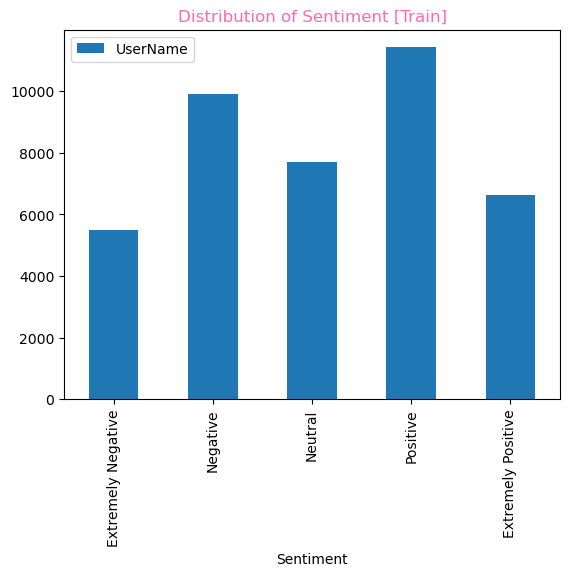

In [413]:
train.groupby(['Sentiment']) \
    .count()[['UserName']] \
    .reindex(['Extremely Negative',
              'Negative',
              'Neutral',
              'Positive',
              'Extremely Positive']) \
    .plot(kind="bar")
plt.title("Distribution of Sentiment [Train]",color='hotpink')
plt.show()

### Tweets Sentiment Distribution --> Test

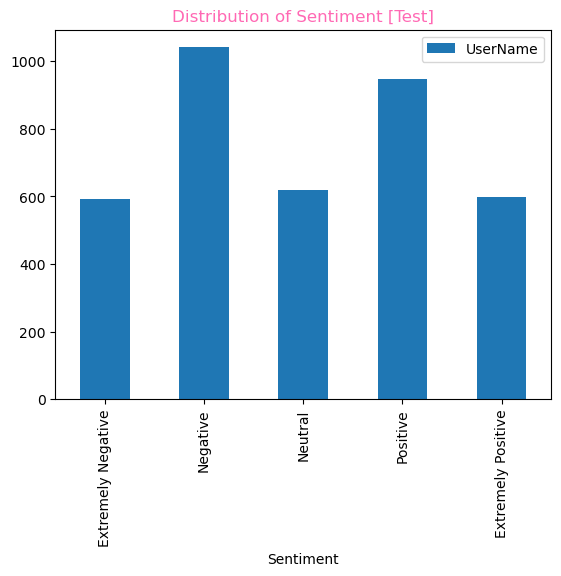

In [414]:
test.groupby(['Sentiment']) \
    .count()[['UserName']] \
    .reindex(['Extremely Negative',
              'Negative',
              'Neutral',
              'Positive',
              'Extremely Positive']) \
    .plot(kind="bar")
plt.title("Distribution of Sentiment [Test]",color='hotpink')
plt.show()

## a. NULL Values

In [415]:
total_null_train = train.isnull().sum().sort_values(ascending = False)
percentage_null_train=((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", train.shape[0])

missing_data = pd.concat([total_null_train, percentage_null_train.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)

Total records =  41157


,Total Missing,In Percent
Location,8590,20.87
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [416]:
total_null_test = test.isnull().sum().sort_values(ascending = False)
percentage_null_test=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", test.shape[0])

missing_data = pd.concat([total_null_test, percentage_null_test.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)


Total records =  3798


,Total Missing,In Percent
Location,834,21.96
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [417]:
# train=train.drop(columns=['Location'],axis=1,inplace=True)

In [418]:
# test=test.drop(columns=['Location'],axis=1,inplace=True)

## b. Reduction of Data

In [419]:
train['Sentiment'].nunique()

5

In [420]:
train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [421]:
test['Sentiment'].nunique()

5

In [422]:
test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

#### Extract and separate the data based on their labels

In [423]:
train0=train[train['Sentiment']=='Negative']
train1=train[train['Sentiment']=='Positive']
train2=train[train['Sentiment']=='Neutral']
train3=train[train['Sentiment']=='Extremely Positive']
train4=train[train['Sentiment']=='Extremely Negative']

In [424]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape

((9917, 6), (11422, 6), (7713, 6), (6624, 6), (5481, 6))

#### Reducing size of each label by 1/5

In [425]:
train0=train0[:int(train0.shape[0]/5)]
train1=train1[:int(train1.shape[0]/5)]
train2=train2[:int(train2.shape[0]/5)]
train3=train3[:int(train3.shape[0]/5)]
train4=train4[:int(train4.shape[0]/5)]

In [426]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape

((1983, 6), (2284, 6), (1542, 6), (1324, 6), (1096, 6))

In [427]:
train=pd.concat([train0,train1,train2,train3,train4],axis=0)

In [428]:
train.shape

(8229, 6)

In [429]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative


#### Dropping all the columns OriginalTweet rating and Sentiment

In [430]:
train=train.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [431]:
train.head()

,OriginalTweet,Sentiment
9,"For corona prevention,we should stop to buy th...",Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative
28,Do you see malicious price increases in NYC? T...,Negative
30,There Is of in the Country The more empty she...,Negative


In [432]:
train.Sentiment.value_counts()

Positive              2284
Negative              1983
Neutral               1542
Extremely Positive    1324
Extremely Negative    1096
Name: Sentiment, dtype: int64

In [433]:
test=test.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [434]:
test.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [435]:
test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

## c. Data Cleaning 

### i. Hashtag Removal

In [436]:
import re

In [437]:
def hashtags_removal(text):
    hashtags = "#[\S]+"
    text = re.sub(hashtags,"",text)
    return text

In [438]:
#Remove Hashtags train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: hashtags_removal(x))

In [439]:
#Remove Hashtags test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: hashtags_removal(x))

### ii. Mentions Removal

In [440]:
def mentions_removal(text):
    mentions = "@[\S]+"
    text = re.sub(mentions,"",text)
    return text

In [441]:
#Remove Mention train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: mentions_removal(x))

In [442]:
#Remove Mention test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: mentions_removal(x))

### iii. URL Removal

In [443]:
def url_removal(text):
    url = "https?://[A-z0-9_%/\-\.]+[A-z0-9_\.\-\?&=%]+"
    text = re.sub(url,"",text)
    return text

In [444]:
#Remove URL train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: url_removal(x))

In [445]:
#Remove URL test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: url_removal(x))

### iv. Stopwords Removal

In [446]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [447]:
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [448]:
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### v. LowerCase

In [449]:
train['OriginalTweet']=train['OriginalTweet'].str.lower()

In [450]:
test['OriginalTweet']=test['OriginalTweet'].str.lower()

### vi. Stemming

In [451]:
import nltk

In [452]:
from nltk.stem import PorterStemmer

In [453]:
stemmer = PorterStemmer()

In [454]:
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

In [455]:
train["OriginalTweet"] = train["OriginalTweet"].apply(stem_sentence)

### vi. Removing Punctuations

In [456]:
def punctuations_removal(text):
    puntuations = "[\.\?!,;:]+"
    text = re.sub(puntuations,"",text)
    return text

In [457]:
#Remove Punctuations train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: punctuations_removal(x))

In [458]:
#Remove Punctuations train
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: punctuations_removal(x))

## d. Randomization

In [459]:
train_array = train.to_numpy()
np.random.shuffle(train_array)
train = pd.DataFrame(train_array, columns=train.columns)

In [460]:
test_array = test.to_numpy()
np.random.shuffle(test_array)
test = pd.DataFrame(test_array, columns=test.columns)

In [461]:
train.head()

,OriginalTweet,Sentiment
0,work groceri store front line shit nobodi wa...,Extremely Positive
1,hello brother 's sister 's let 's connect hand...,Positive
2,still believ bare work despit full deliveri us...,Neutral
3,system place ensur run food,Positive
4,corona prevent stop buy thing cash use onlin ...,Negative


In [462]:
test.head()

,OriginalTweet,Sentiment
0,no toilet paper local supermarket bought kitch...,Negative
1,continues effect including in-store experiences,Neutral
2,having extra income stock non-perishables meds...,Negative
3,state suburban grocery store time thanksgiving...,Positive
4,irish people italian experience anything go by...,Neutral


# 4. EDA for final Dataset

In [463]:
train

,OriginalTweet,Sentiment
0,work groceri store front line shit nobodi wa...,Extremely Positive
1,hello brother 's sister 's let 's connect hand...,Positive
2,still believ bare work despit full deliveri us...,Neutral
3,system place ensur run food,Positive
4,corona prevent stop buy thing cash use onlin ...,Negative
...,...,...
8224,peopl selfish stop stock pile food peopl lik...,Negative
8225,turner join groceri chain repres updat public ...,Neutral
8226,australia wors itali valid advic cmo brendan m...,Negative
8227,pleas confirm whether dis-chemâ statement ( p...,Extremely Positive


In [464]:
test

,OriginalTweet,Sentiment
0,no toilet paper local supermarket bought kitch...,Negative
1,continues effect including in-store experiences,Neutral
2,having extra income stock non-perishables meds...,Negative
3,state suburban grocery store time thanksgiving...,Positive
4,irish people italian experience anything go by...,Neutral
...,...,...
3793,shoppers stockpiling food covid-19 fears,Negative
3794,after best friend conquer local grocery store,Extremely Positive
3795,grocery store customer bought cart full grocer...,Negative
3796,panic buying swamped supermarkets tonight new ...,Negative


### one hot encoding

In [465]:
one_hot_encoding = {
    'Positive': 0,
    'Negative': 1,
    'Neutral': 2,
    'Extremely Positive': 3,
    "Extremely Negative": 4
}

In [466]:
train['Sentiment']=train['Sentiment'].map(one_hot_encoding)

In [467]:
train['Sentiment'].value_counts()

0    2284
1    1983
2    1542
3    1324
4    1096
Name: Sentiment, dtype: int64

### Pie Chart Distribution of sample train tweets

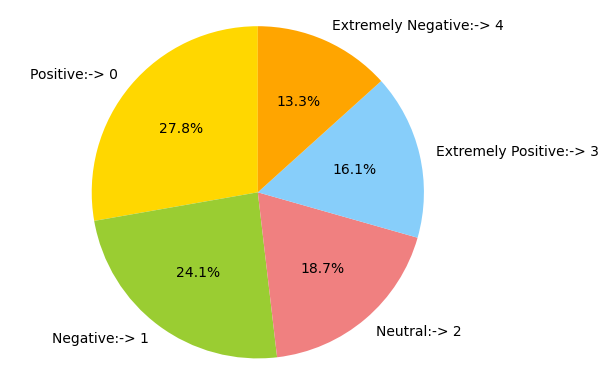

In [468]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive:-> 0', 'Negative:-> 1', 'Neutral:-> 2', 'Extremely Positive:-> 3', 'Extremely Negative:-> 4']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [469]:
test['Sentiment']=test['Sentiment'].map(one_hot_encoding)

In [470]:
test['Sentiment'].value_counts()

1    1041
0     947
2     619
3     599
4     592
Name: Sentiment, dtype: int64

## Bar plot for tweets sentiment distribution on test data

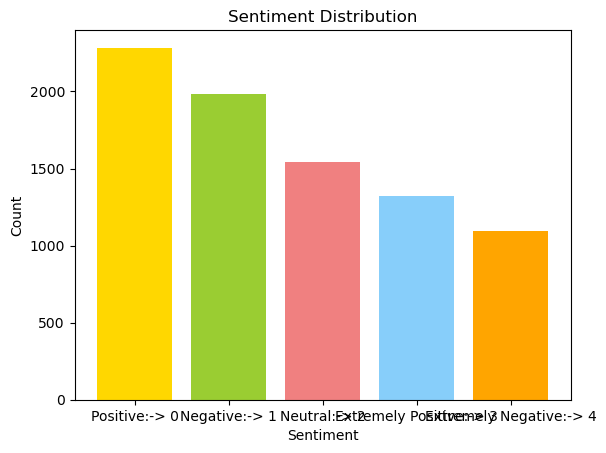

In [471]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive:-> 0', 'Negative:-> 1', 'Neutral:-> 2', 'Extremely Positive:-> 3', 'Extremely Negative:-> 4']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [472]:
x = train["OriginalTweet"].copy()
y = train["Sentiment"].copy()

In [473]:
x.shape

(8229,)

In [474]:
x.head()

0    work groceri store  front line shit  nobodi wa...
1    hello brother 's sister 's let 's connect hand...
2    still believ bare work despit full deliveri us...
3                          system place ensur run food
4    corona prevent  stop buy thing cash use onlin ...
Name: OriginalTweet, dtype: object

In [475]:
y.shape

(8229,)

In [476]:
y.head()

0    3
1    0
2    2
3    0
4    1
Name: Sentiment, dtype: int64

In [477]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  8229 non-null   object
 1   Sentiment      8229 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.7+ KB


In [478]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.5+ KB


In [479]:
train.describe()

,Sentiment
count,8229.000000
mean,1.631182
std,1.381683
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,4.000000


In [480]:
test.describe()

,Sentiment
count,3798.000000
mean,1.696682
std,1.400419
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


In [481]:
x.isnull().sum()

0

In [482]:
y.isnull().sum()

0

In [483]:
x.dtypes

dtype('O')

In [484]:
y.dtypes

dtype('int64')

# 5. Vectorization

## a. TF-IDF

In [485]:
# TfidfVectorizer from sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer

In [486]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## b. BoW

In [487]:
from sklearn.feature_extraction.text import CountVectorizer

In [488]:
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
denselist = X.todense().tolist()
train = pd.DataFrame(denselist, columns=feature_names)

# 6. Model Application

In [489]:
x

0       work groceri store  front line shit  nobodi wa...
1       hello brother 's sister 's let 's connect hand...
2       still believ bare work despit full deliveri us...
3                             system place ensur run food
4       corona prevent  stop buy thing cash use onlin ...
                              ...                        
8224    peopl selfish  stop stock pile food  peopl lik...
8225    turner join groceri chain repres updat public ...
8226    australia wors itali valid advic cmo brendan m...
8227    pleas confirm whether dis-chemâ statement ( p...
8228    went groceri store morn deliveri servic slot s...
Name: OriginalTweet, Length: 8229, dtype: object

In [490]:
y

0       3
1       0
2       2
3       0
4       1
       ..
8224    1
8225    2
8226    1
8227    3
8228    4
Name: Sentiment, Length: 8229, dtype: int64

### Train Test Split

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
x_train,x_test,y_train,y_test=train_test_split(train,y,train_size=0.8,random_state=0)

In [493]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((6583, 1000), (1646, 1000), (6583,), (1646,))

## a. Linear Regression

In [494]:
from sklearn.linear_model import LinearRegression

In [495]:
lin_reg=LinearRegression()

In [496]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [497]:
lin_reg_ypred=lin_reg.predict(x_test)

In [498]:
lin_reg_acc=lin_reg.score(x_test,y_test)

In [499]:
lin_reg_acc

-0.04374663510971

# b. Logistic Regression

In [500]:
from sklearn.linear_model import LogisticRegression

In [501]:
log_reg=LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')

In [502]:
log_reg.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [503]:
log_reg_ypred=log_reg.predict(x_test)

In [504]:
log_reg_acc=log_reg.score(x_test,y_test)

In [505]:
log_reg_acc

0.5103280680437424

## c. Decision Tree

In [506]:
from sklearn.tree import DecisionTreeClassifier

In [507]:
dt_lcf=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2,min_samples_split=2,max_leaf_nodes=3)

In [508]:
dt_lcf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [509]:
dt_ypred=dt_lcf.predict(x_test)

In [510]:
dt_acc=dt_lcf.score(x_test,y_test)

In [511]:
dt_acc

0.3201701093560146

## d. Random Forest

In [512]:
from sklearn.ensemble import RandomForestClassifier

In [513]:
rf_clf=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=4, min_samples_split=2, min_samples_leaf=1,random_state=0)

In [514]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [515]:
rf_ypred=rf_clf.predict(x_test)

In [516]:
rf_acc=rf_clf.score(x_test,y_test)

In [517]:
rf_acc

0.31713244228432563

## e. KNN

In [518]:
from sklearn.neighbors import KNeighborsClassifier

In [519]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=5,weights='distance')

In [520]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [521]:
knn_ypred=knn.predict(x_test)

In [522]:
knn_acc=knn.score(x_test,y_test)

In [523]:
knn_acc

0.2800729040097205

# 7. Drawing Plots to presents Results

In [524]:
names=['Linear Regression','Logistic Regression', 'Decision Tree Classification' ,'Random Forest Classification','KNN']
acc=[lin_reg_acc,log_reg_acc,rf_acc,rf_acc,knn_acc]

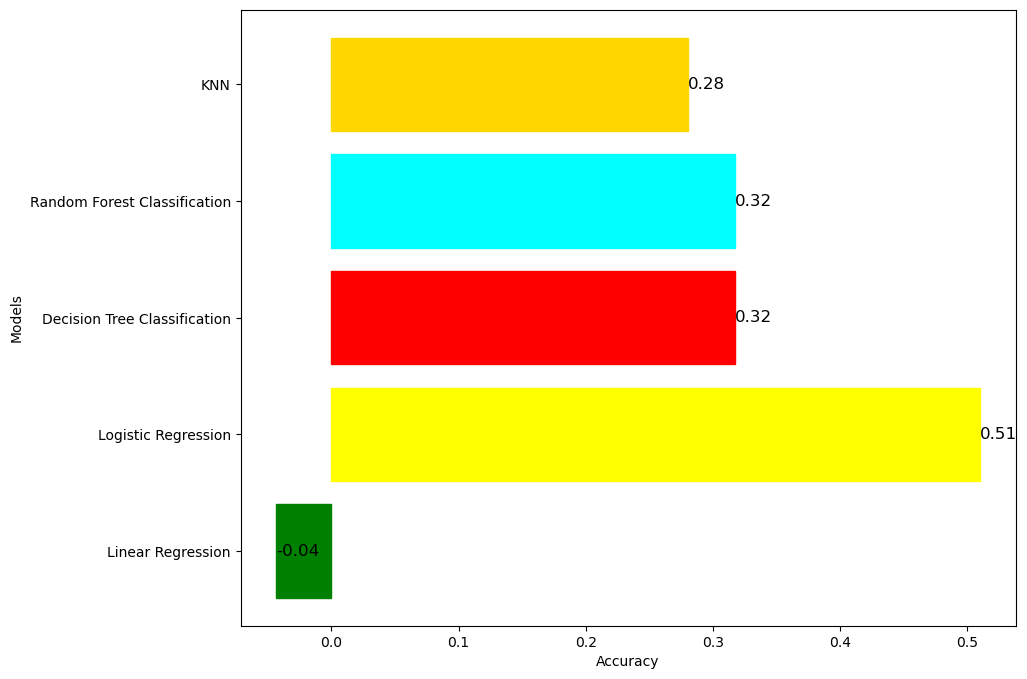

In [525]:
plt.figure(figsize=(10, 8))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('red')
graph[3].set_color('cyan')
graph[4].set_color('gold')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

# 8. HyperParameter Tuning

In [526]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

## i. Linear Regression

In [527]:
from sklearn.model_selection import GridSearchCV

In [528]:
lr = LinearRegression()

In [529]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [530]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

In [531]:
grid_search.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [532]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'fit_intercept': True, 'normalize': False}
Best accuracy:  -0.08663145349073673


In [533]:
y_pred_lin_reg_ht = grid_search.predict(x_test)

In [534]:
print("Mean squared error: ", mean_squared_error(y_test, y_pred_lin_reg_ht))
print("R^2 score: ", r2_score(y_test, y_pred_lin_reg_ht))

Mean squared error:  2.0424428842512534
R^2 score:  -0.04374663510971


In [535]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_fit_intercept',
 'param_normalize',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## ii. Logistic Regression

In [536]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

In [537]:
lr = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

In [538]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [539]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best accuracy:  0.48078563466291857


In [540]:
y_pred_log_ht = grid_search.predict(x_test)

In [541]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## iii. Decision Tree

In [542]:
param_grid = {
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

In [543]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

In [544]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5]})

In [545]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.3141402007417614


In [546]:
y_pred_dt_ht = grid_search.predict(x_test)

In [547]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## iv. Random Forest

In [548]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

In [549]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [550]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5], 'n_estimators': [50]})

In [551]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.3045725409826607


In [552]:
y_pred_rf_ht = grid_search.predict(x_test)

In [553]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## v. KNN

In [554]:
param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}

In [555]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

In [556]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [557]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 3, 'weights': 'distance'}
Best accuracy:  0.29621907115970025


In [558]:
y_pred_knn_ht = grid_search.predict(x_test)

In [566]:
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn_ht))

Confusion matrix:  [[105  51 299  11   5]
 [ 39 100 235   3  19]
 [ 19  28 242   3   1]
 [ 50  29 153  19   5]
 [ 15  77 107   0  31]]


In [559]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [560]:
log_reg_acc_ht=accuracy_score(y_test,y_pred_log_ht)
log_reg_acc_ht

0.4957472660996355

In [561]:
dt_acc_ht=accuracy_score(y_test,y_pred_dt_ht)
dt_acc_ht

0.31652490886998785

In [562]:
rf_acc_ht=accuracy_score(y_test,y_pred_rf_ht)
rf_acc_ht

0.3219927095990279

In [563]:
knn_acc_ht=accuracy_score(y_test,y_pred_knn_ht)
knn_acc_ht

0.3019441069258809

## Drawing Plots to presents Results after hyper parameter tuning

In [564]:
names=['Logistic Regression', 'Decision Tree Classification' ,'Random Forest Classification','KNN']
acc=[log_reg_acc_ht,dt_acc_ht,rf_acc_ht,knn_acc_ht]

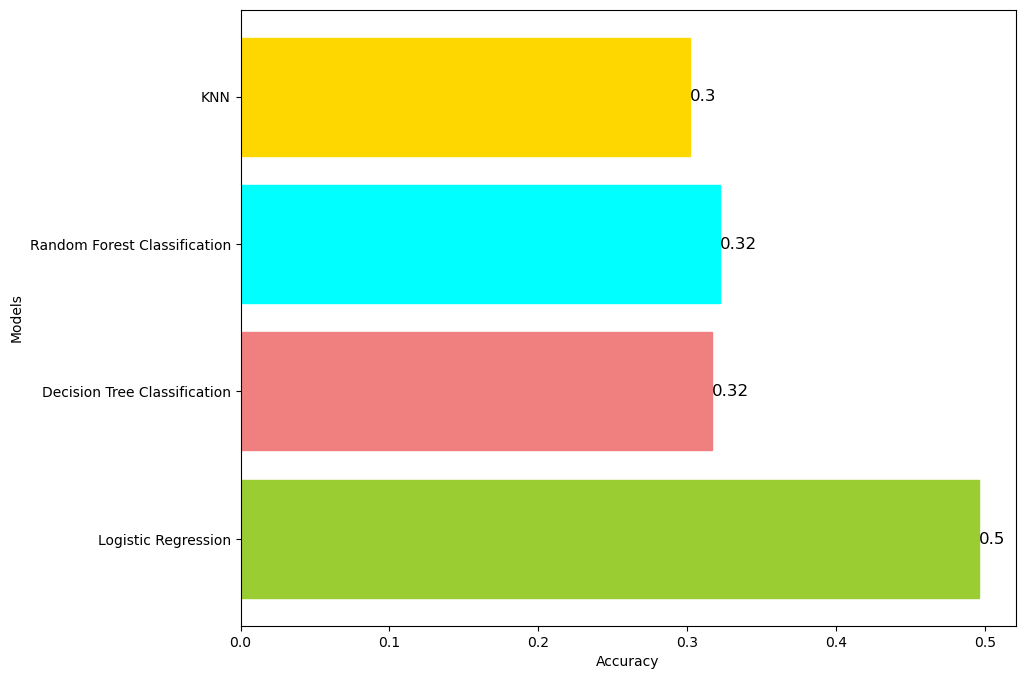

In [565]:
plt.figure(figsize=(10, 8))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('yellowgreen')
graph[1].set_color('lightcoral')
graph[2].set_color('cyan')
graph[3].set_color('gold')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

#### Logistic Regression is performing better among the applied classification algorithms